In [233]:
import matplotlib.pyplot as plt
import pandas as pd

In [234]:
# path = '2.Общий .xlsb'

# data_sample = pd.read_excel(path)


In [235]:
path2 = 'aquiring-activity.csv'
data_sample_aq = pd.read_csv(path2, sep=';')


In [236]:
data_sample_aq.head()

,клиент,31.10.2021,30.11.2021,31.12.2021,31.01.2022,28.02.2022,31.03.2022,30.04.2022,31.05.2022,30.06.2022,...,31.12.2022,31.01.2023,28.02.2023,31.03.2023,30.04.2023,31.05.2023,30.06.2023,31.07.2023,31.08.2023,30.09.2023
0,client_37877,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
1,client_30115,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
2,client_9554,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,client_42590,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,client_14578,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [237]:
df_aq_mau = data_sample_aq.sum()

In [238]:
df_aq_mau

клиент        client_37877client_30115client_9554client_4259...
31.10.2021                                                  186
30.11.2021                                                  181
31.12.2021                                                  181
31.01.2022                                                  182
28.02.2022                                                  180
31.03.2022                                                  179
30.04.2022                                                  184
31.05.2022                                                  184
30.06.2022                                                  188
31.07.2022                                                  179
31.08.2022                                                  159
30.09.2022                                                  659
31.10.2022                                                 1341
30.11.2022                                                 2061
31.12.2022                              

In [239]:
df_aq_mau = df_aq_mau.drop("клиент")

In [240]:
df_aq_mau = df_aq_mau.transpose()
df_aq_mau.head()

31.10.2021    186
30.11.2021    181
31.12.2021    181
31.01.2022    182
28.02.2022    180
dtype: object

In [241]:
df_aq_lost_users = -1 * data_sample_aq.set_index("клиент").diff(axis=1).replace(1, 0).sum()

In [242]:
df_aq_new_users = data_sample_aq.set_index("клиент").diff(axis=1).replace(-1, 0).sum()

In [243]:
df_aq_mau

31.10.2021     186
30.11.2021     181
31.12.2021     181
31.01.2022     182
28.02.2022     180
31.03.2022     179
30.04.2022     184
31.05.2022     184
30.06.2022     188
31.07.2022     179
31.08.2022     159
30.09.2022     659
31.10.2022    1341
30.11.2022    2061
31.12.2022    2910
31.01.2023    3562
28.02.2023    4295
31.03.2023    5276
30.04.2023    6161
31.05.2023    7017
30.06.2023    7852
31.07.2023    8396
31.08.2023    8511
30.09.2023    8546
dtype: object

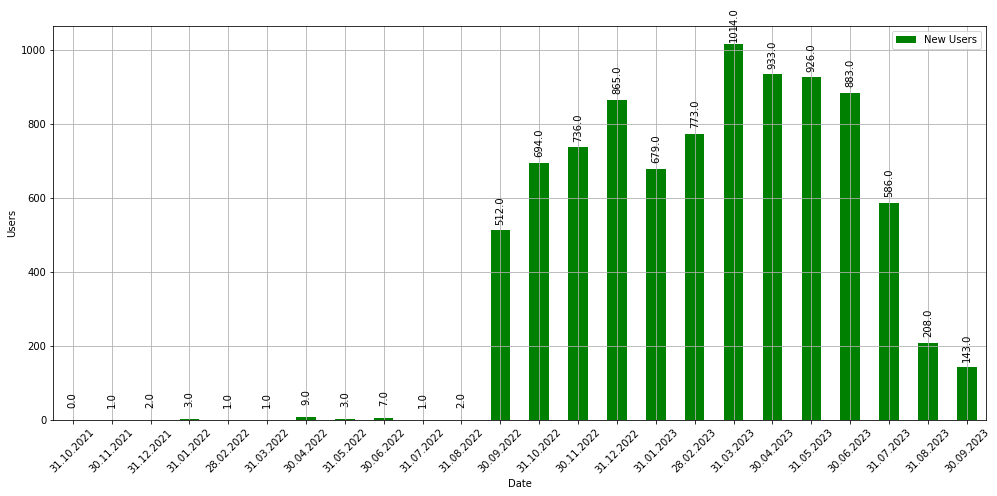

In [244]:


plt.figure(figsize=(14, 7))
# plt.plot(df_aq_mau.index, df_aq_mau.values, label='MAU', color='blue')
# ax = df_aq_mau.plot(kind='bar', color='blue', label='MAU')
ax = df_aq_new_users.plot(kind='bar', color='green', label='New Users')
# plt.plot(df_aq_new_users.index, df_aq_new_users.values, label='New Users', color='green')
# plt.plot(df_aq_lost_users.index, df_aq_lost_users.values, label='Lost Users', color='red')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 20),rotation=90, textcoords='offset points')

plt.tight_layout()
plt.show()



In [245]:
df_aq_mau

31.10.2021     186
30.11.2021     181
31.12.2021     181
31.01.2022     182
28.02.2022     180
31.03.2022     179
30.04.2022     184
31.05.2022     184
30.06.2022     188
31.07.2022     179
31.08.2022     159
30.09.2022     659
31.10.2022    1341
30.11.2022    2061
31.12.2022    2910
31.01.2023    3562
28.02.2023    4295
31.03.2023    5276
30.04.2023    6161
31.05.2023    7017
30.06.2023    7852
31.07.2023    8396
31.08.2023    8511
30.09.2023    8546
dtype: object

In [246]:
# Loading the newly uploaded dataset for churn rate calculation
rko_data_path = path2
rko_data = pd.read_csv(rko_data_path, delimiter=';')

# Converting data to boolean (active/inactive)
rko_data_bool = rko_data.drop('клиент', axis=1) > 0

# Initializing the churn rate series for the new dataset
churn_rate_rko = pd.Series(index=rko_data_bool.columns)

# Calculating the churn rate for each month according to the user's method
for i in range(1, len(rko_data_bool.columns)):
    prev_month = rko_data_bool.columns[i - 1]
    current_month = rko_data_bool.columns[i]

    # Number of active customers in the previous month
    active_prev_month_count = rko_data_bool[prev_month].sum()

    # Number of customers who left in the current month
    customers_left_count = rko_data_bool[prev_month] & ~rko_data_bool[current_month]
    customers_left_count = customers_left_count.sum()

    # Calculating churn rate
    churn_rate_rko[current_month] = customers_left_count / active_prev_month_count if active_prev_month_count != 0 else 0

# Displaying the first few values of the churn rate for validation
churn_rate_rko.head()


/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_41991/1706026653.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  churn_rate_rko = pd.Series(index=rko_data_bool.columns)


31.10.2021         NaN
30.11.2021    0.032258
31.12.2021    0.011050
31.01.2022    0.011050
28.02.2022    0.016484
dtype: float64

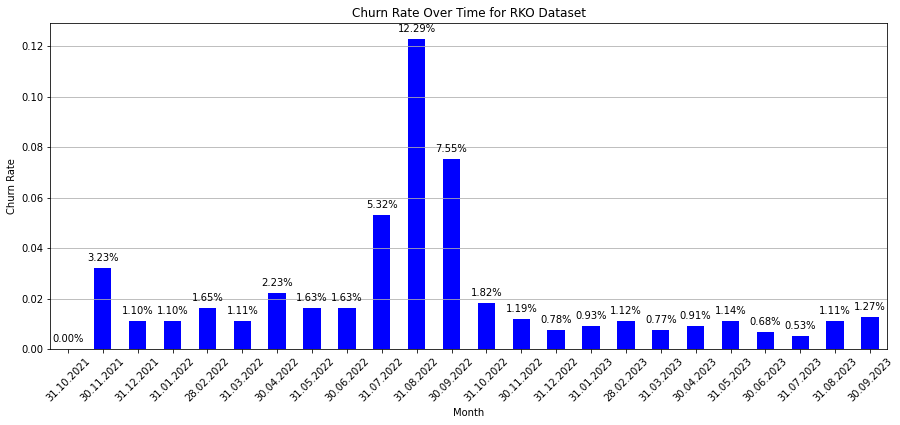

In [247]:
# Plotting the churn rate over time with data point values
plt.figure(figsize=(15, 6))
ax = churn_rate_rko.plot(kind='bar', color='blue')
plt.title('Churn Rate Over Time for RKO Dataset')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding data point values on the graph
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [248]:
# Calculating the Retention Rate
# Retention Rate = (Number of customers who were active in both the current and previous month) / 
#                 (Number of active customers in the previous month)

# Initializing the retention rate series
retention_rate = pd.Series(index=rko_data_bool.columns)

# Calculating the retention rate for each month
for i in range(1, len(rko_data_bool.columns)):
    prev_month = rko_data_bool.columns[i - 1]
    current_month = rko_data_bool.columns[i]

    # Number of active customers in the previous month
    active_prev_month_count = rko_data_bool[prev_month].sum()

    # Number of customers who were active in both months
    active_both_months_count = (rko_data_bool[prev_month] & rko_data_bool[current_month]).sum()

    # Calculating retention rate
    retention_rate[current_month] = active_both_months_count / active_prev_month_count if active_prev_month_count != 0 else 0

# Displaying the first few values of the retention rate for validation
retention_rate.head()


/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_41991/1998685593.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  retention_rate = pd.Series(index=rko_data_bool.columns)


31.10.2021         NaN
30.11.2021    0.967742
31.12.2021    0.988950
31.01.2022    0.988950
28.02.2022    0.983516
dtype: float64

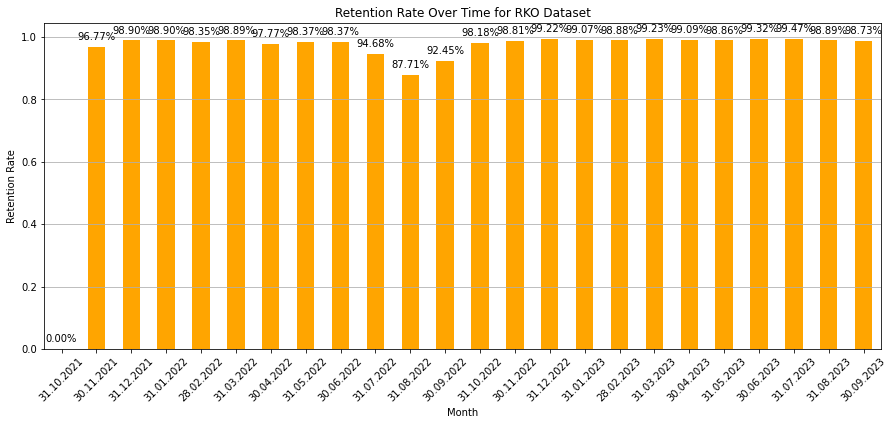

In [249]:
# Plotting the retention rate over time with data point values
plt.figure(figsize=(15, 6))
ax = retention_rate.plot(kind='bar', color='orange')
plt.title('Retention Rate Over Time for RKO Dataset')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding data point values on the graph
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [250]:
churn_rate

31.10.2021         NaN
30.11.2021    2.988048
31.12.2021    2.258727
31.01.2022    8.613445
28.02.2022    5.287356
31.03.2022     6.31068
30.04.2022     8.80829
31.05.2022    2.840909
30.06.2022    5.555556
31.07.2022    4.643963
31.08.2022    1.298701
30.09.2022        -0.0
31.10.2022        -0.0
30.11.2022        -0.0
31.12.2022        -0.0
31.01.2023        -0.0
28.02.2023        -0.0
31.03.2023        -0.0
30.04.2023        -0.0
31.05.2023        -0.0
30.06.2023        -0.0
31.07.2023        -0.0
31.08.2023    0.853235
30.09.2023    0.702733
31.10.2023    0.572698
dtype: object